# Forecast & Predictions Project
The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. In order to fight churn, Model Fitness has digitized a number of its customer profiles. My task is to analyze them and come up with a customer retention strategy.

# Download the data

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
df.columns = df.columns.str.lower()


In [6]:
print(df.duplicated().sum())


0


# Carry out exploratory data analysis (EDA)

In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [8]:
df.groupby('churn').mean().T


churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


We'll plot bar histograms and feature distributions for those who left (churn) and those who stayed:


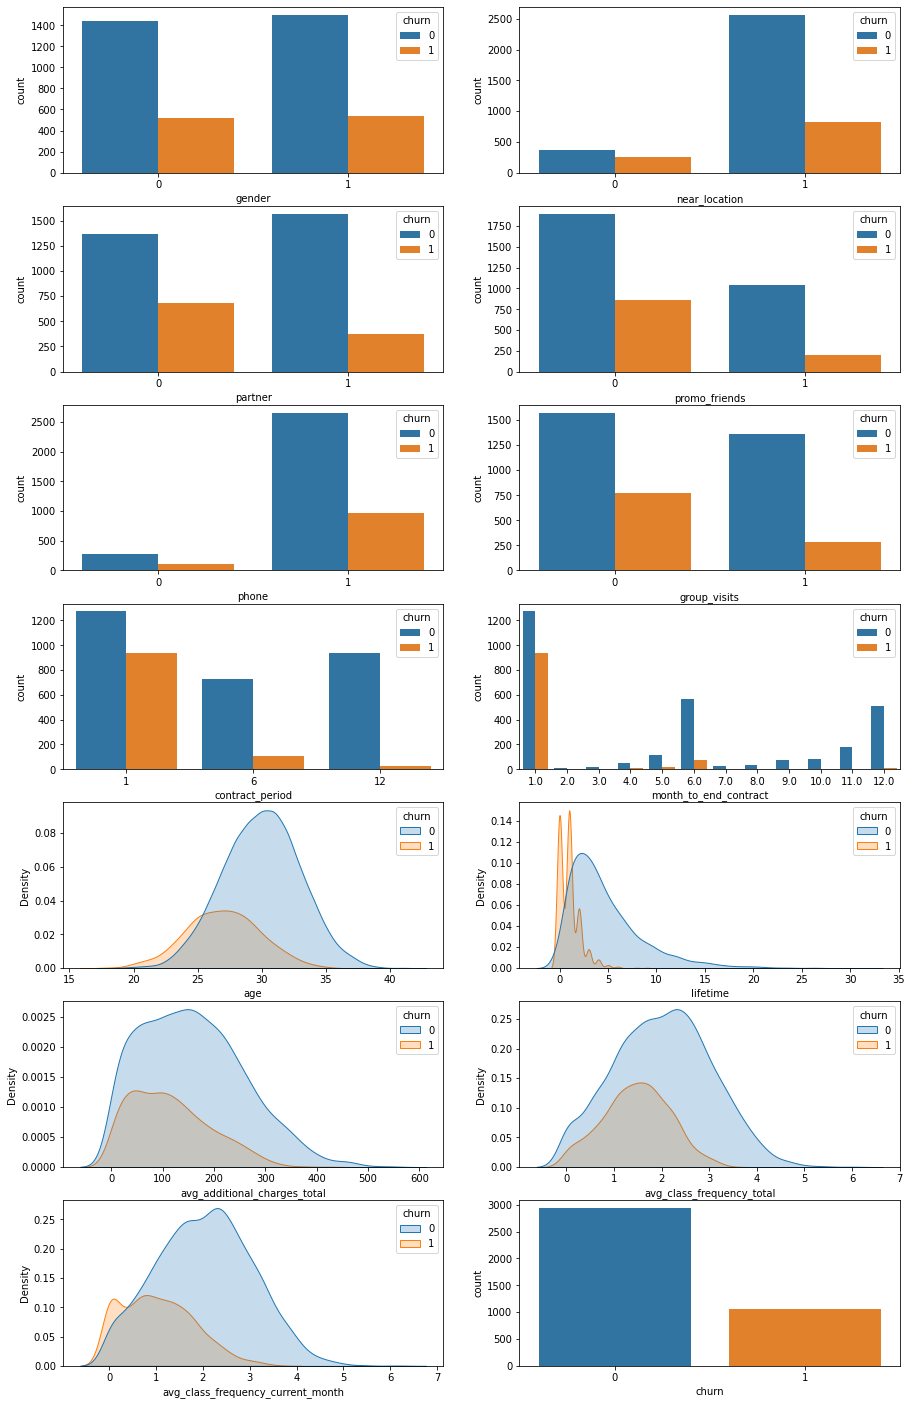

In [9]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 25))
sns.countplot(ax=axes[0, 0], x='gender', data=df, hue='churn')
sns.countplot(ax=axes[0, 1], x='near_location', data=df, hue='churn')
sns.countplot(ax=axes[1, 0], x='partner', data=df, hue='churn')
sns.countplot(ax=axes[1, 1], x='promo_friends', data=df, hue='churn')
sns.countplot(ax=axes[2, 0], x='phone', data=df, hue='churn')
sns.countplot(ax=axes[2, 1], x='group_visits', data=df, hue='churn')
sns.countplot(ax=axes[3, 0], x='contract_period', data=df, hue='churn')
sns.countplot(ax=axes[3, 1], x='month_to_end_contract', data=df, hue='churn')
sns.kdeplot(ax=axes[4, 0], x="age", data=df, hue="churn", shade=True)
sns.kdeplot(ax=axes[4, 1], x="lifetime", data=df, hue="churn", shade=True)
sns.kdeplot(ax=axes[5, 0], x="avg_additional_charges_total", data=df, hue="churn", shade=True)
sns.kdeplot(ax=axes[5, 1], x="avg_class_frequency_total", data=df, hue="churn", shade=True)
sns.kdeplot(ax=axes[6, 0], x="avg_class_frequency_current_month", data=df, hue="churn", shade=True)
sns.countplot(ax=axes[6, 1], x='churn', data=df)
fig.show()

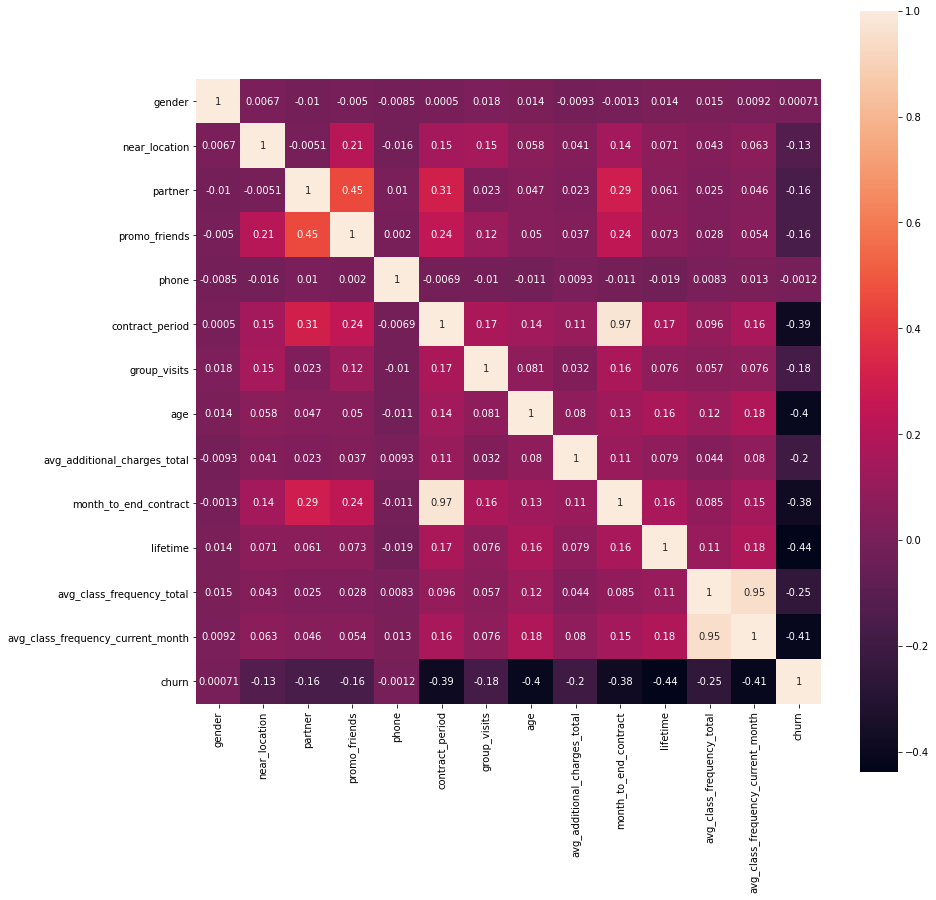

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix, annot=True, square=True)
plt.show()

There are no missing features in the dataset, and the data types looks right.

Regarding mean values and standard deviation, 7 out of 14 columns contain Boolean values. Gender and partner are quite balanced. The rest are leaning towards either the positive or negative class. In particular, phone column which with 90 %. Churned rate is 26.5%. Considering the rest of the columns, looking at the mean and standard deviation, most columns distribution are close to normal, besides lifetime, which is positively skewed.

Regarding mean feature values in churn groups, there is a noticeable differences between the groups. Active customers are much more engaged in the gym activities, have longer contracts, spent more money and tend to live closer to the gym.

The bar histograms and feature distributions confirmed our findings.

Regarding the correlation matrix, there are no strong positive correlation coefficients for the target variable, churn. There are 2 pairs of features that strongly correlate with each other: avg_class_frequency_total + avg_class_frequency_current_month and contract_period + month_to_end_contract. 

# Build a model to predict user churn

In [11]:
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)
models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)]
def make_prediction(m, X_train, y_train, X_test, y_test):
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    print('Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(accuracy_score(y_test, y_pred), 
                                                                  precision_score(y_test, y_pred),
                                                                  recall_score(y_test, y_pred)))
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

    

LogisticRegression(random_state=0)
Accuracy:0.94 Precision:0.90 Recall:0.85
RandomForestClassifier(random_state=0)
Accuracy:0.92 Precision:0.88 Recall:0.83


In [12]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [13]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")




Elapsed time to compute the importances: 0.012 seconds


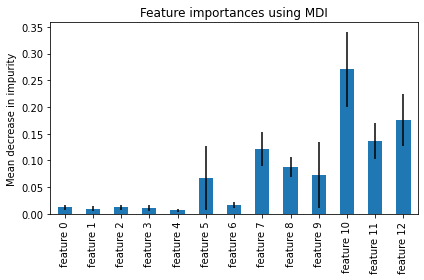

In [14]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [15]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    print('Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(accuracy_score(y_test, y_pred), 
                                                                  precision_score(y_test, y_pred),
                                                                  recall_score(y_test, y_pred)))

In [16]:
make_prediction(forest, X_train_st, y_train, X_test_st, y_test)

Accuracy:0.92 Precision:0.88 Recall:0.83


In [17]:
forest12 = LogisticRegression(random_state=0)
forest12.fit(X_train, y_train)

LogisticRegression(random_state=0)

We divided the data with 80/20 split. We used stratification because the labels of the target variable are not balanced. We trained the model on the train set with two methods: logistic regression and random forest and calculated the required metrics: accuracy, precision, and recall. Both models metrics are great but logistic regression is a little bit better and is considered the best between the two in this case.

# Create user clusters

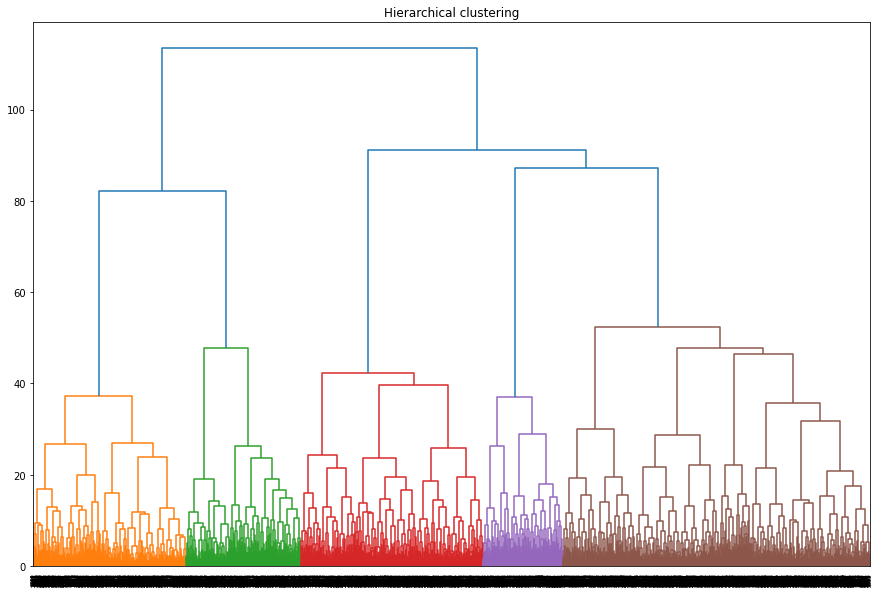

In [18]:
sc = StandardScaler()
X_sc = sc.fit_transform(df)
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering')
plt.show()


<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Could you try to optimize code? We need less time for running it. </div>

<div class="alert alert-block alert-info">
<b>Student answer. I Didn't know how to do it i know it's taking a bit more time to implement but what do you suggest ?</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>
    
Hmmm.... now everything works instantly. Perhaps, something getting wrong on server last time.</div>

In [19]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_sc)
df['cluster_km'] = labels
df.groupby('cluster_km').mean().reset_index()

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.503676,0.000000,0.459559,0.075368,0.917279,2.069853,0.211397,28.522059,132.741216,1.950368,2.757353,1.706629,1.515890,0.450368
1,1,0.492829,0.936115,0.764016,0.534550,0.919166,10.447197,0.516297,29.962190,161.853561,9.477184,4.833116,2.788103,2.786919,0.007823
2,2,0.507917,1.000000,0.323995,0.213155,0.903776,1.546894,0.287454,26.926918,113.173051,1.500609,1.031669,1.449720,1.037592,0.961023
3,3,0.521186,0.996610,0.282203,0.208475,0.904237,1.882203,0.452542,30.237288,157.988625,1.794915,4.923729,2.203432,2.207359,0.003390
4,4,0.518895,0.968023,0.744186,0.526163,0.873547,8.859012,0.534884,29.728198,162.907495,8.155523,4.411337,0.957744,0.943967,0.024709


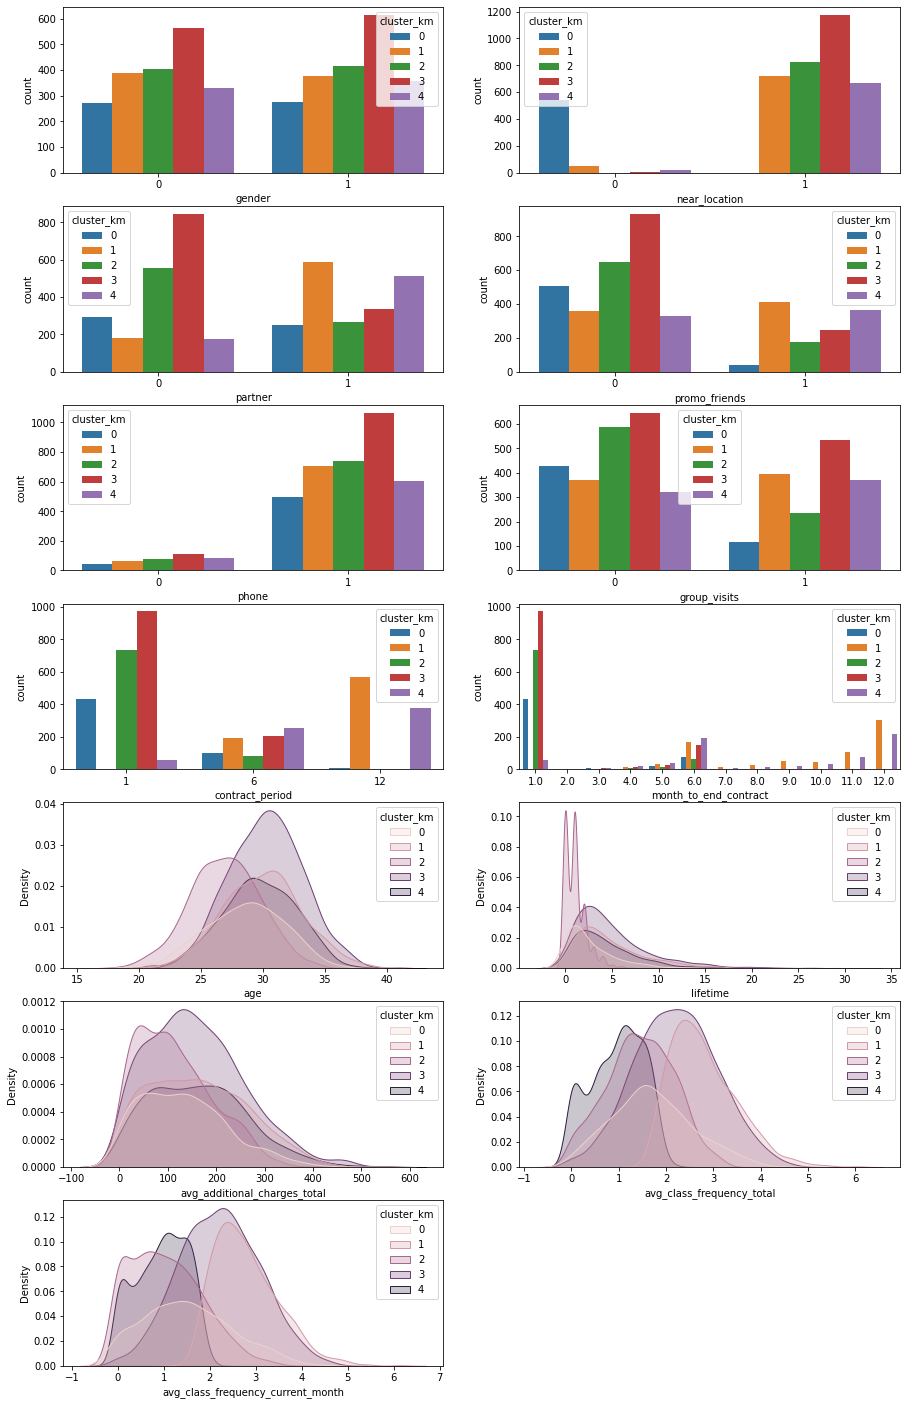

In [20]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 25))
sns.countplot(ax=axes[0, 0], x='gender', data=df, hue='cluster_km')
sns.countplot(ax=axes[0, 1], x='near_location', data=df, hue='cluster_km')
sns.countplot(ax=axes[1, 0], x='partner', data=df, hue='cluster_km')
sns.countplot(ax=axes[1, 1], x='promo_friends', data=df, hue='cluster_km')
sns.countplot(ax=axes[2, 0], x='phone', data=df, hue='cluster_km')
sns.countplot(ax=axes[2, 1], x='group_visits', data=df, hue='cluster_km')
sns.countplot(ax=axes[3, 0], x='contract_period', data=df, hue='cluster_km')
sns.countplot(ax=axes[3, 1], x='month_to_end_contract', data=df, hue='cluster_km')
sns.kdeplot(ax=axes[4, 0], x="age", data=df, hue="cluster_km", shade=True)
sns.kdeplot(ax=axes[4, 1], x="lifetime", data=df, hue="cluster_km", shade=True)
sns.kdeplot(ax=axes[5, 0], x="avg_additional_charges_total", data=df, hue="cluster_km", shade=True)
sns.kdeplot(ax=axes[5, 1], x="avg_class_frequency_total", data=df, hue="cluster_km", shade=True)
sns.kdeplot(ax=axes[6, 0], x="avg_class_frequency_current_month", data=df, hue="cluster_km", shade=True)
axes[6,1].set_visible(False)
fig.show()

In [21]:
churn = df.groupby(['cluster_km']).agg({'gender':'count', 'churn':'sum'})
churn.columns = ['num_customers', 'churn_amount']
churn['churn_rate_percent'] = ((churn['churn_amount'] / churn['num_customers']) * 100).round(2)
churn

,num_customers,churn_amount,churn_rate_percent
cluster_km,,,
0,544,245,45.04
1,767,6,0.78
2,821,789,96.10
3,1180,4,0.34
4,688,17,2.47


We standardized the data. Then we used the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. From the dendrogram, we see that we have 5 clusters. We proceed and trained the clustering model with the K-means algorithm with 5 clusters.

Look at the mean feature values and distributions for clusters, we can see that each cluster is different in some aspects:

All cluster 0 customers don't live near the gym, with large churn rate of 45%.

Cluster 2 customers had the shortest gym lifetime, average of 1 month since the customer first came to the gym. Almost all of those customers churned - 96%.

Cluster 1,3 and 4 are all very engaged in the gym with very low churn rates: Cluster 1 customers have the highest contract period and frequency of visits. Cluster 3 customers partner and promo_friends average are the much lower compared to 1 and 4, and they have the shortest contract periods too, around 2 months compared to 8+ for clusters 1 and 4. Cluster 4 customers have very low churn rate but averages less than 1 visit per week, compared to 2+ visits for clusters 1 and 3.

# Come up with conclusions and basic recommendations on working with customers

Our task was to analyze gym chain Model Fitness customer profiles and come up with a customer retention strategy.

We carried out exploratory data analysis in order to build a model to predict user churn.

We built a binary classification model for customers where the target feature is the user's leaving next month. We settled on logistic regression model.

We found that typical churned customers visited the gym less often, had shorter contract periods, didn't attend the group sessions frequently and weren't referred to the gym from a partner company or a friend.

The active customers mostly signed up through a discount offer, signed longer contract and took part in group sessions.

My basic recommendations on working with customers would be:

* Create more promotions and discounted promos, a friend recommendation especially should be prioritized.

* Try to sell longer period membership. Offer discount if needed.

* Make group sessions more sought after.

* Try and collaborate with more partner companies.